# 什么是感知机

感知机是一种简单的监督学习的二分类模型，属于早期的人工神经网络。它通过接收输入特征，并加权求和（包括一个偏置项），然后通过激活函数（通常是符号函数）来判断输入数据属于哪一个分类。感知机的学习规则基于错误修正，通过逐渐调整权重来减少分类错误，适用于线性可分的数据集。这种模型虽然简单，但在理解更复杂的神经网络结构中起到了基础性的作用。

感知机的图示：

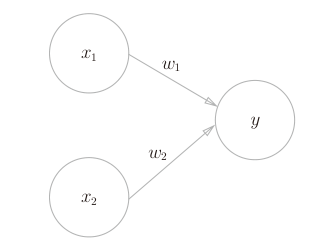

上图中 $x_1$ 和 $x_2$ 是输入信号，$y$ 则是输出信号，而 $w_1$ 和 $w_2$ 则是权重，途中的O则是"神经元"或者"节点"。

输入信号被送往神经元的时候，会被乘以固定的权重，也就是 $w_1x_1$ 和 $w_2x_2$，但是只有这个结果达到了某一个阈值（$θ$），才会让神经元输出1，也就是激活了神经元。

可以用数学公式来进行表示：

$$
y = \begin{cases} 
0 & \text{if } w_1x_1 + w_2x_2 \leq \theta \\
1 & \text{if } w_1x_1 + w_2x_2 > \theta 
\end{cases}
$$

如果一个信号的权重越大，说明这个信号的重要性越高。

# 简单逻辑电路

**与门 （AND）**

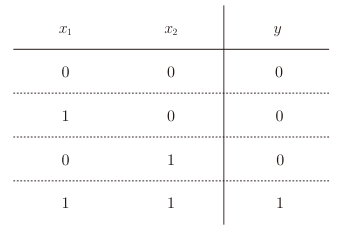

对于与门而言，只有当两个信号都同时为True的时候，才会得到True。

**与非门（NOT AND）**

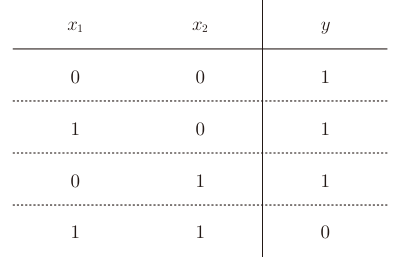

与非门是于门的相反，只有当两个信号输入都为0的时候，才会输出True。

**或门（OR）**

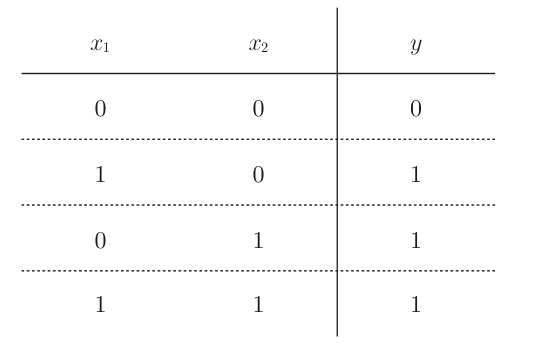

只要两个输入信号中有一个信号为1，则结果为True；也就是说，只有两个信号都为0的时候，才会出现False的结果。

# 感知机的实现

首先实现与门感知机：

In [1]:
# 与门感知机
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

然后尝试一下不同信号组合和结果：

In [4]:
AND(0, 0)

0

In [5]:
AND(1, 0)

0

In [6]:
AND(0, 1)

0

In [7]:
AND(1, 1)

1

从结果可以发现：只有当两个输入都为1的时候，才会得到True的结果。

偏置项

首先要对先前的公式进行修改：

$$
y = \begin{cases} 
0 & \text{if } b + w_1x_1 + w_2x_2 \leq 0 \\
1 & \text{if } b + w_1x_1 + w_2x_2 > 0 
\end{cases}
$$

b在这里是偏执，两个信号和权重的成绩的和将会加上这个偏置项，然后当结果大于0的时候才会输出1，否则就是输出0。

In [8]:
import numpy as np
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

In [9]:
w * x

array([0. , 0.5])

In [10]:
np.sum(w*x)

0.5

In [11]:
np.sum(w*x) + b

-0.19999999999999996

接着使用偏执项和权重来实现与门：

In [12]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

需要注意：$w_1, w_2$ 是用来控制输入信号的重要性的参数，但是偏置项是调整神经元被激活的容易程度的参数。

比如说：

- b = -0.1：只要输入信号的加权和超过0.1就可以激活神经元了
- b = -0.9：输入信号的加权和要超过0.9才可以激活神经元

通过b可以调整激活神经元的难易程度。

与非门：

In [13]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [14]:
NAND(0, 0)

1

In [15]:
NAND(1, 0)

1

In [16]:
NAND(0, 1)

1

In [17]:
NAND(1, 1)

0

或门：

In [18]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [20]:
OR(0, 0)

0

In [21]:
OR(1, 0)

1

In [22]:
OR(0, 1)

1

In [23]:
OR(1, 1)

1

# 感知机的局限性

上面实现了三种门：与门，与非门，或门。

这里需要介绍另外一种情况：异或门（XOR gate）。

如下图所示：

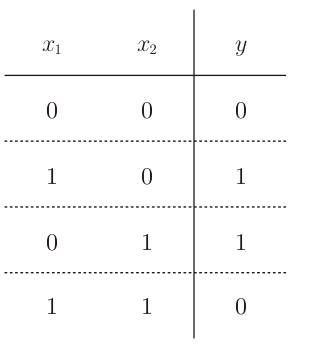

亦或门的逻辑为：仅当两个信号中的一个信号为1的时候，结果才会是True。

如果我们使用或门，将参数设置为（b, w1, w2） = (-0.5, 1.0, 1.0)的情况之下，可视化结果如下所示：

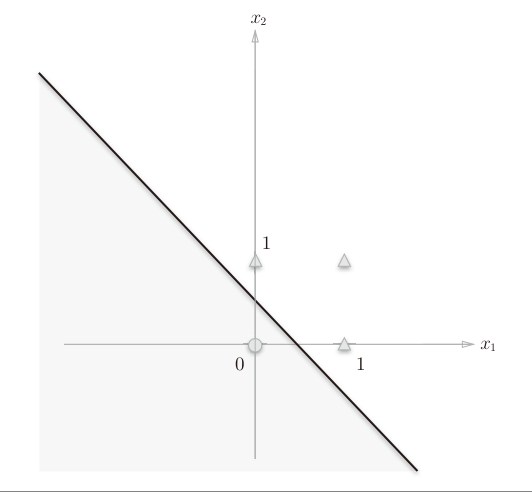

可以发现这个参数很好的将OR的真值表区分开来了。

然后异或门的真值表的可视化如下图所示：

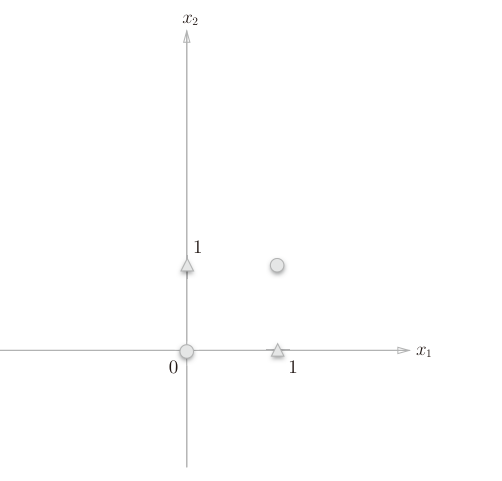

可以发现，无论我们如何平移上图中的直线，我们都无法将三角形和原型区分开来。

因为如果我们要进行分割，我们需要如下所示的情况：

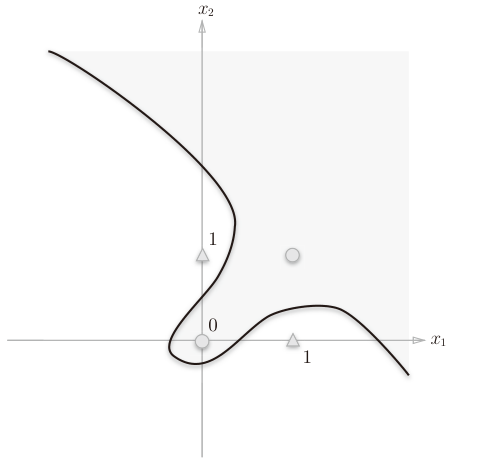

也就是说XOR的真值表是线性不可分割的。

# 多层感知机

感知机无法表示异或门，但是我们可以通过叠加感知机来进行组合。

如下图所示：

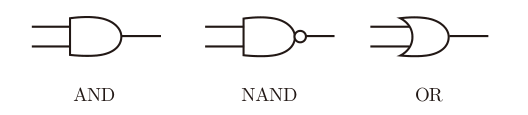

然后进行组合：

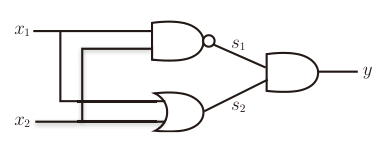

真值表如下所示：

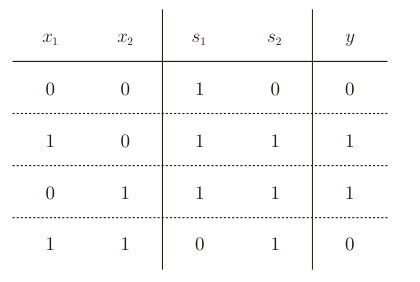

在上表中，x1和x2首先会被传给NAND和OR，然后两个门的结果会被是作为新的x1和x2，然后传给AND。

即便我们可以这样想：

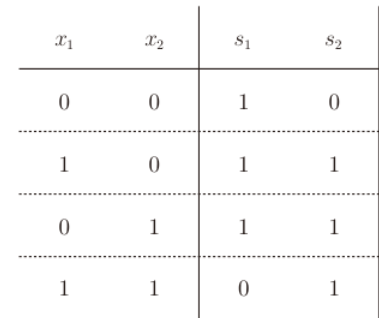 和 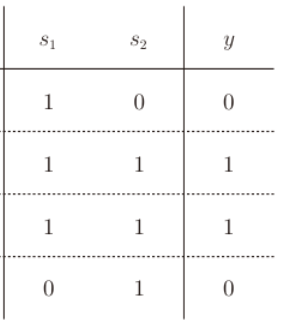

In [24]:
# 进行代码实现
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [25]:
XOR(0, 0)

0

In [26]:
XOR(1, 0)

1

In [28]:
XOR(0, 1)

1

In [29]:
XOR(0, 0)

0

异或门是一种多层结构的神经网络，如下图所示：

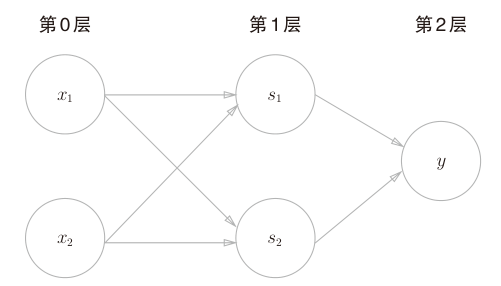

第0层接受信号，然后将其传给第1层，第1层处理信号，然后将结果都传给第2层神经元，第2层处理完来自第1层的输入，给出一个最终的输出结果。

这种叠加了多层的感知机被称为多层感知机。

# 从与非门到计算机

多层感知机可以实现比之前见到的电路更复杂的电路。比如，进行加法
运算的加法器也可以用感知机实现。此外，将二进制转换为十进制的编码器、
满足某些条件就输出1的电路（用于等价检验的电路）等也可以用感知机表示。
实际上，使用感知机甚至可以表示计算机！

已有研究证明，2层感知机（严格地说是激活函数使用了非线性的sigmoid函数的感知机）可以表示任意函数。

万能逼近定理（Universal Approximation Theorem）：这个定理表明，具有至少一层隐藏层的神经网络，只要有足够的神经元并使用非线性激活函数（如 sigmoid、ReLU 等），理论上可以近似任何连续的函数到任意精度。这不限于 sigmoid 函数，也适用于其他非线性激活函数。

隐藏层的重要性：单层的感知机（没有隐藏层，只有输出层，使用阶跃函数作为激活函数）只能解决线性可分的问题。当添加了非线性的激活函数和至少一个隐藏层时，神经网络的表达能力大幅提升，能够处理非线性问题。

非线性激活函数：非线性激活函数是实现这种功能的关键，因为它允许神经网络学习和模拟非线性复杂关系。如果使用线性激活函数，网络无论层数多深，都只能表达线性组合。

神经元数量：理论上，需要足够多的神经元来达到所需的近似精度。在实际应用中，这通常意味着需要大量的神经元和大量的训练数据，以及合理的网络结构设计。

虽然理论上可以近似任何函数，但在实际应用中，要达到高精度和有效的学习可能非常困难。网络的训练可能会受到过拟合、梯度消失或梯度爆炸等问题的影响。

网络的训练效率和实际效果还受到许多因素的影响，如训练算法的选择、超参数的设定、数据的质量和量等。